Setup

In [161]:
import os

import numpy
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from math import *
from decimal import Decimal

# Part A: Model Code (60 pts)

1. Write a function to calculate and return the Minkowski distance with optional argument p defaulting to ‘p=2’ (Euclidean) of two vectors where a vector represents a data point.[6 pts]

In [162]:
# Helper function - calculate distance value to given root value
# ('p' is root value)
# I'm going to name all of my custom functions starting with "custom_" so as not to
# confuse them with the SciPy versions of these functions later.

def p_root(value, root):
    root_value = 1 / float(root)
    return round(Decimal(value) **
                 Decimal(root_value), 3)


# Minkowski distance function using helper
def custom_minkowski_distance(x_vector, y_vector, p_value=2):
    # Parallel calculation of p_values
    return (p_root(sum(pow(abs(a - b), p_value)
                       for a, b in zip(x_vector, y_vector)), p_value))

In [163]:
# test execution with sample vectors
vector1 = [0, 1, 2, 4]
vector2 = [1, 3, 2, 5]
print(custom_minkowski_distance(vector1, vector2))
del (vector1, vector2)

2.449


2. Write a function to calculate and return the accuracy of two vectors. [4 pts]

In [164]:
def custom_accuracy(y_vals, y_preds):
    true_predictions = 0
    for i in range(len(y_vals)):
        if y_preds[i] == y_vals[i]:
            true_predictions += 1
    acc_val = true_predictions / len(y_vals)
    return round(acc_val, 3)

In [165]:
# test execution on sample data
y_vals_input = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_preds_input = [0, 0, 0, 1, 1, 0, 0, 0, 1, 1]
#TP: 2
#FP: 2
#TN: 3
#FN: 3
print("Accuracy score: ", custom_accuracy(y_vals_input, y_preds_input))

Accuracy score:  0.5


3. Write three functions to compute: precision, recall and F1 score. [6 pts]

In [166]:
#Precision: TruePos / (TruePos + FalsePos)
def custom_precision(y_vals, y_preds):
    if y_preds.count(1) == 0:
        raise Exception("Cannot calculate precision value: No predicted positives.")
    else:
        TruePos = 0
        FalsePos = 0
        for i in range(len(y_vals)):
            if y_preds[i] == 1:
                if y_vals[i] == 1: TruePos += 1
                if y_vals[i] == 0: FalsePos += 1
        prec_score = TruePos / y_preds.count(1)
    return round(prec_score, 3)


# Recall: TruePos / (TruePos + FalseNeg)
def custom_recall(y_vals, y_preds):
    TruePos = 0
    FalseNeg = 0
    for i in range(len(y_vals)):
        if y_vals[i] == 1:
            if y_preds[i] == 1: TruePos += 1
            if y_preds[i] == 0: FalseNeg += 1
    if y_vals.count(1) == 0:
        raise Exception("Cannot calculate recall: No real positives.")
    else:
        recall_score = TruePos / (TruePos + FalseNeg)
    return round(recall_score, 3)


# F1: TruePos / (TruePos + 0.5(FalsePos + FalseNeg))
def custom_F1_score(y_vals, y_preds):
    TruePos = 0
    FalsePos = 0
    FalseNeg = 0
    for i in range(len(y_vals)):
        if y_vals[i] == 1:
            if y_preds[i] == 1: TruePos += 1
            if y_preds[i] == 0: FalseNeg += 1
        else:
            if y_preds == 1: FalsePos += 1
    if TruePos == FalsePos == FalseNeg == 0:
        raise Exception("Cannot calculate F1: 0 predicted positives and 0 false negatives; only true negatives found.")
    F1_val = TruePos / (TruePos + (FalsePos + FalseNeg) / 2)
    return round(F1_val, 3)


print("Precision score: ", custom_precision(y_vals_input, y_preds_input))
print("Recall score: ", custom_recall(y_vals_input, y_preds_input))
print("F1 score: ", custom_F1_score(y_vals_input, y_preds_input))

Precision score:  0.5
Recall score:  0.4
F1 score:  0.571


4. Write a function to compute the confusion matrix of two vectors. [4 pts]

In [167]:
def custom_confusion_matrix(y_vals, y_preds):
    TruePos = 0
    FalsePos = 0
    TrueNeg = 0
    FalseNeg = 0
    for i in range(len(y_vals)):
        if y_vals[i] == 1:
            if y_preds[i] == 1: TruePos += 1
            if y_preds[i] == 0: FalseNeg += 1
        else:
            if y_preds[i] == 1: FalsePos += 1
            if y_preds[i] == 0: TrueNeg += 1
    conf_mtrx = pd.DataFrame([[TruePos, FalsePos], [TrueNeg, FalseNeg]],
                             index=["Predicted Positive", "Predicted Negative"],
                             columns=["Actual Positive", "Actual Negative"])
    return conf_mtrx


custom_confusion_matrix(y_vals_input, y_preds_input)
# With test vectors, should be:
# TP: 2 ; FP: 2
# TN: 3 ; FN: 3

,Actual Positive,Actual Negative
Predicted Positive,2,2
Predicted Negative,3,3


5. Write a function to generate the Receiver Operating Characteristic (ROC) curve. [5 pts]

In [168]:
# First I build a function which takes a list of true y-values and a list of y-probabilities and gives roc 'coordinates'.
def custom_roc_calc(y_vals, y_probs):
    # first check that the lengths of true values and probabilities match.
    if len(y_vals) != len(y_probs):
        raise Exception("Length of y_vals and y_probs do not match.")
    else:
        # Outermost loop loops over every unique y_prob value -- if this is too intensive for large datasets, I could change it to an arbitrary list of values from 0 to 1. I create one object which will contain the ROC 'coordinates', or True Positive Rate and False Positive Rate, and another object, which will contain labels indicating the threshold value at a given point.
        coords = [[], []]
        labels = []
        for i in range(len(np.unique(y_probs))):
            threshold = np.unique(y_probs)[i]
            labels.append(threshold)
            y_preds = []
            # This loop checks each probability value against the current threshold to produce predictions.
            for j in range(len(y_probs)):
                if y_probs[j] >= threshold:
                    y_preds.append(1)
                else:
                    y_preds.append(0)
            # This next loop calculates the number of True Positives and False Positives.
            TruePos = 0
            FalsePos = 0
            for k in range(len(y_preds)):
                if y_vals[k] == 1:
                    if y_preds[k] == 1: TruePos += 1
                if y_vals[k] == 0:
                    if y_preds[k] == 1: FalsePos += 1
            # I use the True Positive and False Positive counts to calculate the True Positive Rate and False Positive Rate. 
            # For simplicity, I call y_vals.count(1) for TP + FN and y_vals.count(0) for FP + TN rate.
            # I append these to the ROC coordinates object. This will produce an ROC coordinates object with as many coordinates as there are unique values of y_probs.
            TruePosRate = TruePos / y_vals.count(1)
            FalsePosRate = FalsePos / y_vals.count(0)
            coords[0].append(FalsePosRate)
            coords[1].append(TruePosRate)
        return coords, labels


# Next I produce a function to actually plot the graph from the values calculated in custom_roc_calc.

def custom_roc_curve(y_vals, y_probs):
    # I start with my helper function constructed above.
    roc_coords = custom_roc_calc(y_vals, y_probs)
    # I then produce a simple matplotlib plot
    roc_plot = plt.figure()
    plt.plot(roc_coords[0][0], roc_coords[0][1], figure=roc_plot)
    plt.title("ROC Plot", figure=roc_plot)
    plt.xlabel('False Positive Rate', figure=roc_plot)
    plt.ylabel('True Positive Rate', figure=roc_plot)
    plt.ylim((0, 1))
    plt.xlim((0, 1))
    # I include a Y=X axis line to represent the ROC of random guessing.
    plt.axline((0, 0), (1, 1), linestyle='--', alpha=0.6, color='gray', figure=roc_plot)
    # This loop plots the labels. Note: if I need, I may edit this or even disable it to limit the number of labels when plotting bigger datasets to avoid visual clutter. This is mostly intended for my own purposes optimizing my model later.
    labels = enumerate(roc_coords[1])
    for i, label in labels:
        plt.annotate(label, (roc_coords[0][0][i], roc_coords[0][1][i]))
    # By using plt.close() I set the plot to not display (until I call "return"). This way, this function will output the graph as an object without also printing it a second time.
    plt.close(roc_plot)
    return roc_plot


In [169]:
# I create & inspect test data and test my roc_calc function on it.
y_probs_input = [0.1, 0.01, 0.2, 0.45, 0.61, 0.2, 0.9, 0.1, 0.37, 0.9, 0.7, 0.8, 0.6, 0.3, 0.5, 0.55, 0.97, 0.88, 0.035,
                 0.9]
y_vals_input = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
print("Probabilities and values are the same length: ", len(y_probs_input) == len(y_vals_input))
roc_coords_test = custom_roc_calc(y_vals_input, y_probs_input)
print("ROC coordinates: ", roc_coords_test[0])
print("ROC coordinate labels: ", roc_coords_test[1])

Probabilities and values are the same length:  True
ROC coordinates:  [[1.0, 0.9, 0.9, 0.7, 0.5, 0.5, 0.4, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.0], [1.0, 1.0, 0.9, 0.9, 0.9, 0.8, 0.8, 0.8, 0.7, 0.6, 0.5, 0.5, 0.4, 0.3, 0.2, 0.1]]
ROC coordinate labels:  [0.01, 0.035, 0.1, 0.2, 0.3, 0.37, 0.45, 0.5, 0.55, 0.6, 0.61, 0.7, 0.8, 0.88, 0.9, 0.97]


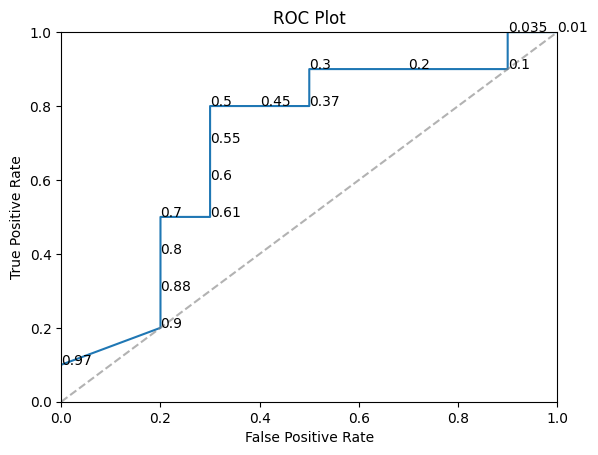

In [170]:
# Finally, I test my complete ROC plotting function on the test data.
ROC_graph = custom_roc_curve(y_vals_input, y_probs_input)
ROC_graph

6. Write a function to compute area under curve (AUC) for the ROC curve. [5 pts]


In [171]:
# When I think "area under curve" I think integral calculus--and ideally I would have wanted to approximate an equation for our ROC curve with perhaps a fourier analysis, and then integrate that equation from 0 to 1. However, since that would be prohibitively complicated in this context, I instead use simple geometry. I use the method listed in a number of sources (e.g. here: https://trumpexcel.com/calculate-area-under-curve-excel/). I divide the curve into trapezoids formed between the points, and calculate the sum total area of all those trapezoids.
def custom_auc_score(y_vals, y_preds):
    roc_coords = custom_roc_calc(y_vals, y_preds)
    area = 0
    # The equation for the area of a trapezoid is A = height * (length of top + length of bottom)/2
    # Using the abovementioned method of summing the areas of trapezoids formed between points, the area under the line between two points (x1, y1) and (x2, y2) can be computed: (y1 + y2)/2 * (x2 - x1) and the total area under the curve calculated as the sum of all those areas.
    for i in range((len(roc_coords[0][0]) - 1)):
        area += (roc_coords[0][1][i] + roc_coords[0][1][i + 1]) / 2 * (roc_coords[0][0][i] - roc_coords[0][0][i + 1])
    return area


In [172]:
custom_auc_score(y_vals_input, y_probs_input)

0.7

7. Write a function to generate the precision-recall curve. [5 pts]


In [173]:
def custom_precision_recall_calc(y_vals, y_probs):
    # first check that the lengths of true values and probabilities match.
    if len(y_vals) != len(y_probs):
        raise Exception("Length of y_vals and y_probs do not match.")
    else:
        # Outermost loop loops over every unique y_prob value -- if this is too intensive for large datasets, I could change it to an arbitrary list of values from 0 to 1. I create one object which will contain the precision_recall 'coordinates', or precision and recall values, and another object, which will contain labels indicating the threshold value at a given point.
        coords = [[], []]
        labels = []
        for i in range(len(np.unique(y_probs))):
            threshold = np.unique(y_probs)[i]
            labels.append(threshold)
            y_preds = []
            # This loop checks each probability value against the current threshold to produce predictions.
            for j in range(len(y_probs)):
                if y_probs[j] >= threshold:
                    y_preds.append(1)
                else:
                    y_preds.append(0)
            # This next loop calculates the number of True Positives, False Positives, and False Negatives.
            TruePos = 0
            FalsePos = 0
            FalseNeg = 0
            for k in range(len(y_preds)):
                if y_vals[k] == 1:
                    if y_preds[k] == 1:
                        TruePos += 1
                    else:
                        FalseNeg += 1
                if y_vals[k] == 0:
                    if y_preds[k] == 1: FalsePos += 1
            # I use the TP, FP, and FN counts to calculate precision and recall and appends them to the P-R coordinates object. This will produce as many coordinates as there are unique values of y_probs.
            Recall = TruePos / (TruePos + FalseNeg)
            Precision = TruePos / (TruePos + FalsePos)
            coords[0].append(Recall)
            coords[1].append(Precision)
        return coords, labels


# Next I produce a function to actually plot the graph from the values calculated in custom_roc_calc.

def custom_precision_recall_curve(y_vals, y_probs):
    # I start with my helper function constructed above.
    pr_coords = custom_precision_recall_calc(y_vals, y_probs)
    # I then produce a simple matplotlib plot
    pr_plot = plt.figure()
    plt.plot(pr_coords[0][0], pr_coords[0][1], figure=pr_plot)
    plt.title("Precision-Recall Plot", figure=pr_plot)
    plt.xlabel('Recall', figure=pr_plot)
    plt.ylabel('Precision', figure=pr_plot)
    plt.ylim((0, 1))
    plt.xlim((0, 1))

    # This loop plots the labels. Note: if I need, I may edit this or even disable it to limit the number of labels when plotting bigger datasets to avoid visual clutter. This is mostly intended for my own purposes optimizing my model later.
    labels = enumerate(pr_coords[1])
    for i, label in labels:
        plt.annotate(label, (pr_coords[0][0][i], pr_coords[0][1][i]))

    # By using plt.close() I set the plot to not display (until I call "return"). This way, this function will output the graph as an object without also printing it a second time.
    plt.close(pr_plot)

    return pr_plot


In [174]:
custom_precision_recall_calc(y_vals_input, y_probs_input)

([[1.0,
   1.0,
   0.9,
   0.9,
   0.9,
   0.8,
   0.8,
   0.8,
   0.7,
   0.6,
   0.5,
   0.5,
   0.4,
   0.3,
   0.2,
   0.1],
  [0.5,
   0.5263157894736842,
   0.5,
   0.5625,
   0.6428571428571429,
   0.6153846153846154,
   0.6666666666666666,
   0.7272727272727273,
   0.7,
   0.6666666666666666,
   0.625,
   0.7142857142857143,
   0.6666666666666666,
   0.6,
   0.5,
   1.0]],
 [0.01,
  0.035,
  0.1,
  0.2,
  0.3,
  0.37,
  0.45,
  0.5,
  0.55,
  0.6,
  0.61,
  0.7,
  0.8,
  0.88,
  0.9,
  0.97])

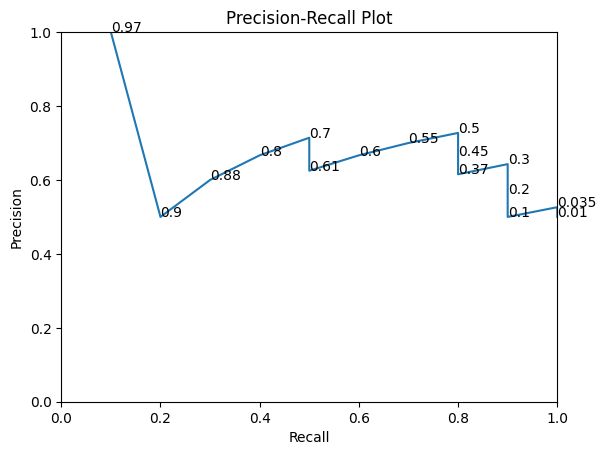

In [175]:
custom_precision_recall_curve(y_vals_input, y_probs_input)

8. Implement a KNN_Classifier model class. It should have the following three methods. [20
pts]
  a) __init__(self,) It’s a standard python initialization function so we can instantiate the
class. Just “pass” this. [5 pts]

Arguments:
- n_neighbors : int, optional (default = 5) The number of nearest neighbors.
- weights : string, optional (default = ‘uniform’) The weight function used in prediction.
Possible values:
- ‘uniform’: uniform weights. All points in each neighborhood are weighted
equally.
- ‘distance’: weight points by the inverse of their distance. in this case, closer
neighbors of a query point will have a greater influence than neighbors which are
further away
p: int, optional (default = 2) Minkowski distance.
Returns: No return value necessary.
b) fit(self, X, Y) This method simply needs to store the relevant values as instance
variables. [5 pts]
Arguments:
X : ndarray A numpy array with rows representing data samples and columns representing
features.
Y : ndarray A 1D numpy array with labels corresponding to each row of the feature matrix X.
Returns: No return value necessary.
c) predict(self, X,threshold=.5) This method will use the instance variables stored by the fit
method. [2 pts] Arguments:
X : ndarray A numpy array containing samples to be used for prediction. Its rows represent data
samples and columns represent features.
Returns: 1D array of class labels for each row in X. The 1D array should be designed as a
column vector. Hint: you can just have this call predict_proba(...) and use threshold after
d) predict_proba(self, X) Same as c) but for probabilities [3 pts] Arguments:
X : ndarray A numpy array containing samples to be used for prediction. Its rows represent data
samples and columns represent features.
Returns: 1D array of prediction probabilities for positive class for each row in X. The 1D
array should be designed as a column vector.
e) get_params(self) Get parameters for this estimator. [3 pts]
Arguments: N/A
Returns: dict Model parameter names mapped to their values.
f) set_params(self, **params) [2 pts] Arguments:
**params : dict A dictionary with the model parameter names to change mapped to their values
Returns: No return value necessary.

In [189]:
from collections import Counter

class KNN_Classifier:
    """
    A class to represent K-Nearest Neighbors.
    
    Parameters
    ----------
    n_neighbors : int, optional
        The number of nearest neighbors. (default is 5)
    weights : str, optional
        The weight function used in prediction. (Default is "uniform".) Must be one of: 
            - "uniform" : uniform weights. All points in each neighborhood are weighted equally.
            - "distance" : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away
    p : float, optional
        Minkowski distance p. (default is 2)
    """
    
    WEIGHTS_TYPE = [
        'uniform',
        'distance',
    ]

    # standard python initialization function so we can instantiate the class
    def __init__(self, n_neighbors: int = 5, weights: str = "uniform", p: int = 2):
        if weights not in KNN_Classifier.WEIGHTS_TYPE:
            raise ValueError("Invalid weights. Expected one of: %s" % KNN_Classifier.WEIGHTS_TYPE)

        self.n_neighbors = n_neighbors
        self.weights = weights
        self.p = p
        
        self._X = None        
        self._Y = None

    def fit(self, X: np.ndarray, Y: np.ndarray):
        """
        This method simply needs to store the relevant values as instance variables.
    
        :param X: A numpy array with rows representing data samples and columns representing features.
        :param Y: A 1D numpy array with labels corresponding to each row of the feature matrix X.
        :return: self
        """ 
        self._X = X
        self._Y = Y
        return self
        
    def predict(self, X: np.ndarray, threshold = .5):
        """
        This method will use the instance variables stored by the `fit` method.
    
        :param X: A numpy array containing samples to be used for prediction. Its rows represent data samples and columns represent features
        :param threshold: optional 
        :return: 1D array of class labels for each row in X. The 1D array should be designed as a column vector. Hint: you can just have this call predict_proba(...) and use threshold after
        """ 
        if self._X is None or self._Y is None:
            raise AttributeError("Must call `.fit` method first.")

        # TODO
        # return self.predict_proba(X)
        
        # ref: https://medium.com/analytics-vidhya/implementing-k-nearest-neighbours-knn-without-using-scikit-learn-3905b4decc3c
        final_output = []
        for sample_column_index in range(len(X)):
            distance_array = []
            votes = []
            for j in range(len(self._X)):
                distance = custom_minkowski_distance(self._X[j] , X[sample_column_index], self.p)
                distance_array.append([distance, j])
            distance_array.sort()
            distance_range = distance_array[0:self.n_neighbors]
            for _key, value in distance_range:
                votes.append(self._Y[value])
            label = Counter(votes).most_common(1)[0][0]
            final_output.append(label)
            
        return final_output
    
    def predict_proba(self, X: np.ndarray):
        """
        This method calculates predictions for probabilities.

        :param X: A numpy array containing samples to be used for prediction. Its rows represent data samples and columns represent features.
        :return: 1D array of prediction probabilities for positive class for each row in X. The 1D array should be designed as a column vector.
        """
        # TODO
    
    def get_params(self):
        """
        Get parameters for this estimator.
        :return dict: Model parameter names mapped to their values.
        """
        return {
            "n_neighbors": self.n_neighbors,
            "weights": self.weights,
            "p": self.p
        }
    
    def set_params(self, **params):
        """
        A setter for this estimator.
        :param params: A dictionary with the model parameter names to change mapped to their values.
        :return: Nothing
        """
        if params.get("n_neighbors") is not None:
            if type(params.get("n_neighbors")) is not int:
                raise TypeError("n_neighbors must be an integer")
            self.n_neighbors = params["n_neighbors"]
        if params.get("weights") is not None:
            if type(params.get("weights")) is not str:
                raise TypeError("weights must be a string")
            if params.get("weights") not in KNN_Classifier.WEIGHTS_TYPE:
                raise ValueError("Invalid weights. Expected one of: %s" % KNN_Classifier.WEIGHTS_TYPE)
            self.weights = params["weights"]
        if params.get("p") is not None:
            if type(params.get("p")) is not int:
                raise TypeError("p must be an integer")
            self.p = params["p"]    

Working tabs: https://medium.com/analytics-vidhya/implementing-k-nearest-neighbours-knn-without-using-scikit-learn-3905b4decc3c

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://ioflood.com/blog/iterate-a-dictionary-in-python-guide-with-examples/#:~:text=The%20basic%20method%20is%20to,control%20over%20the%20iteration%20process.


In [190]:
### FOR TESTING PURPOSES ONLY ###
# taken from examples on scikitlearn docs https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
X_test = [[0], [1], [2], [3]]
y_test = [0, 0, 1, 1]

knnc_test = KNN_Classifier(n_neighbors=3)
print(knnc_test.fit(X_test, y_test))
# expected output: KNeighborsClassifier(...)
print(knnc_test.predict([[1.1]]))
# expected output: [0]
print(knnc_test.predict_proba([[0.9]]))
# expected output: [[0.666... 0.333...]]

[0]
None


9. Write a function named “partition” to split your data into training and test sets. The function
should take 4 arguments: [ 5 pts]
• feature matrix (numpy array with rows representing data samples and columns
representing features.),
• target vector (numpy array with labels corresponding to each row of the feature
matrix),
• t where t is a real number to determine the size of partition. For example, if t is set to
0.2, then 80% of the data will be used for training and 20% for testing.
• shuffle (default=True) where shuffle is a boolean whether to shuffle the data prior to
partitioning. You will be required to use “shuffle=True” for this assignment
• This function should return two feature matrices for training and test data, and two
target vectors for training and test data (4 tuple).

In [ ]:
def partition(feature_matrix: np.ndarray, target_vector: np.ndarray, t=0.2, shuffle=True):
    """
    This method splits the data into training and test sets.
    :param feature_matrix: numpy array with rows representing data samples and columns representing features.
    :param target_vector: numpy array with labels corresponding to each row of the feature matrix
    :param t: A real number to determine the size of partition. For example, if t is set to 0.2, then 80% of the data will be used for training and 20% for testing.
    :param shuffle: A boolean whether to shuffle the data prior to partitioning.
    :return: This function should return two feature matrices for training and test data, and two target vectors for training and test data (4 tuple).
    """

Part B: Data Processing, Feature Selection, and Initial Estimation (40 pts)
10. Read in the winequality-white.csv file as a Pandas data frame.

11. The target will be the “quality” column which represents the rating of wine and ranges from
3 to 8. You will need to convert it into a two-category variable consisting of “good” (quality
> 5) & “bad” (quality <= 5). Your target vector should have 0s (representing “bad” quality
wine) and 1s (representing “good” quality wine). [2 pts]

12. Provide a table with univariate statistics of your data (mean, standard deviation, and
quartiles, min, max, missing count, number of unique values). [4 pts]

13. Generate pair plots using the seaborn package to help identify redundant features. For any
redundant features(?), report, drop, and explain your logic (w/ markdown). [4 pts]

14. Use your “partition” function to split the data into 80% train and 20% test. [5 pts]

15. Naively run your KNN_Classifier model on the training dataset with n_neighbors = 5 and
using Euclidean distance. [15 pts]

a. Use accuracy and F1 score to compare your predictions to the expected labels.

b. Now standardize each feature of your training set (subtract mean and divide by
standard deviation) and apply trained standardization to the test set. Use the mean
and standard deviation values for each feature in the training set to scale the test
data (you can use sklearn.preprocessing.StandardScaler)

c. Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1
score with the expected labels.

d. Compare the two accuracy values and the F1 scores; and decide whether you should
use standardized data or unscaled data for the remainder of the assignment.

e. Perform a similar test for inverse distance weighting in the KNN_Classifier model
and determine whether or not to use it. [5 pts]

16. Repeat #15 a-d, but using a logistic regression with ‘elasticnet’ or ‘l2’ penalty (feel free to
use sklearn.linear_model.LogisticRegression) [10 pts]

Part C: Model Evaluation and Results Summary (100 pts)
17) Evaluation of an estimator performance via cross-validation: Implement the S-fold cross
validation function. [15 pts]
a. sFold(folds, data, labels, model, model_args, error_fuction)
    i. folds is an integer number of folds.
    ii. data is a numpy array with rows representing data samples and columns
representing features.
    iii. labels is a numpy array with labels corresponding to each row of
training_features.
    iv. model is an object with the fit and predict methods.
    v. model args is a dictionary of arguments to pass to the classification algorithm. If
you are unfamiliar, look up using the ** operator to unpack dictionaries as
arguments
    vi. error_function :Returns error value between predicted and true labels. For
example, mean squared error (mse) function could be used as error_function.
b. How it should work:
    i. Use a helper function to calculate an s-partition of the data (i.e., partition the data into s
equally sized portions). You may use sklearn.model_selection.KFold if you wish and
assume data is already shuffled.
    ii. For each partition
        a. Make a model using the model class
        b. Fit the data to all other partitions (1 – folds)
        c. Make prediction on current partition
        d. Store expected labels and predicted labels for current partition
    iii. Calculate the average error (for all partitions) using the error_function on stored
expected and predicted labels
c. It should return a Python tuple with the following
    i. Expected labels
    ii. Predicted labels
    iii. Average error

18) Only using the training portion of your data, use your sfold function to evaluate the
performance of your model over each combination of k and distance metrics from the following
sets: [10 pts]
i. k=[1,5,9,11]
b. distance = [Euclidean, Manhattan]
ii. weights = [uniform, distance]
iii. From the returned tuple store as a row in a pandas DataFrame with headers:
Experiment name, k, distance, weights, Average F1
iv. Determine the best model based on the overall performance. For the error_function
of the S-fold function argument use the F1 score function from Part A.

19) Repeat #18 for at least 3 experiments for the regularized logistic regression from #16
and discuss why you optimized over your selected hyper-parameters [10 pts]

20) Based on the results above, use the full training portion (80%), to re-estimate your best
(subjective) model. Discuss why you made your choice. [5 pts]

21) Evaluate your best model on the test data and report the performance measures.[10 pts]
i. Precision
ii. Recall
iii. F1 score
iv. Confusion matrix
v. Accuracy & Generalization Error

22) Generate the ROC curve and determine the optimal threshold that maximizes the F1 score.
[10 pts] Note: for F1, you can iterate through possible thresholds and check F1 for each.

23) Compute the AUC score. [5 pts]

24) Generate the precision-recall curve and determine the optimal threshold (visually). [5 pts]

25) Calculate and report the 95% confidence interval on the generalization error estimate. [5pts]
2 possible options (others as well):
1. Use the s fold accuracy scores (score for each fold) and take the standard deviation, then
subtracting/adding from the average, 1.96 (95% confidence interval) times the std dev
2. Use the following: Accuracy +/- 1.96 * sqrt( (accuracy * (1 - accuracy)) / n)

26) Write a “Summary and Methods” section. [10 pts] No more than 2-5 sentences for each
question below:
i. Provide a summary of the project and what you completed in the assignment.
ii. Describe the dataset and features. What is the target? What are you calculating it from?
iii. Describe the differences in fit and predict between the regularized logistic regression vs
KNN_Classifier. In particular, discuss training time vs prediction time for large data.
Also discuss the hyperparameters of each and why they are used.

27) Write a “Results” section. [15 pts] No more than 2-5 sentences for each question below
a) Describe the performance of the KNN model with respect to the different levels of k
and the different distance metrics. Include a table of performances, bolding the best.
b) Characterize the overall performance of your model.
c) Discuss which quality values (original rating) led to good performance of your model
and those that resulted in poor performance. Include a table of average error (e.g., F1
score) to support your claims.
d) Give any final conclusions.